<a href="https://colab.research.google.com/github/Adityamg107/Project/blob/main/Diwali_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir("drive")

In [5]:
os.chdir("MyDrive")

In [6]:
os.chdir("datasets")

In [7]:
os.listdir()

['train_schedule.csv',
 'googleplaystore.csv',
 'deliveries.csv',
 'matches.csv',
 'Smartphones_cleaned_dataset.csv',
 'train_info.csv',
 'IPL2025Batters.csv',
 'Diwali Sales Data (1).csv']

In [8]:
data=pd.read_csv("Diwali Sales Data (1).csv",encoding="latin-1")
data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


Numpy

In [10]:
# 1. Average amount spent
avg_amt= np.mean(data["Amount"])
print("Average Amount Spent:", avg_amt)

Average Amount Spent: 9453.610857727557


In [11]:
# 2. Maximum order amount
max_amt = np.max(data["Amount"])
data[data["Amount"]==max_amt]


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN


In [12]:
# 3. Total revenue
total_revenue = np.sum(data["Amount"])
print("Total Revenue:", total_revenue)


Total Revenue: 106249132.43


In [13]:
# 4.top 5 maximum amount spent by state
state_amount = data.groupby("State")["Amount"].sum().sort_values(ascending=False).head(5)
state_amount


,Amount
State,
Uttar Pradesh,19374968.00
Maharashtra,14427543.00
Karnataka,13523540.00
Delhi,11603819.45
Madhya Pradesh,8101142.00


In [14]:
#5.Customer minimum age
mina=np.min(data["Age"])
data[data["Age"]==mina].head(1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
414,1001088,Phan,P00354342,M,0-17,12,1,Uttar Pradesh,Central,Aviation,Furniture,2,20058.0,NaN,NaN


In [15]:
#6.Customer maximum age
ma=np.max(data["Age"])
data[data["Age"]==ma].head(1)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
359,1003036,Prescott,P00255842,F,55+,92,0,Uttarakhand,Central,Chemical,Furniture,2,20239.0,NaN,NaN


In [16]:
#7.Top 10 most sold product
data.groupby("Product_Category")["Orders"].sum().sort_values(ascending=False).head(10)

,Orders
Product_Category,
Clothing & Apparel,6634
Food,6120
Electronics & Gadgets,5226
Footwear & Shoes,2654
Household items,1331
Beauty,1086
Games & Toys,940
Furniture,890
Sports Products,870


In [17]:
#8. Total number of orders by male and female
data.groupby("Gender")["Orders"].sum()

,Orders
Gender,
F,19568
M,8439


PANDAS

In [18]:
# 1. Total amount spent  by gender
data.groupby("Gender")["Amount"].sum()

,Amount
Gender,
F,74335856.43
M,31913276.00


In [19]:
# 2. Average amount by age group
data.groupby("Age Group")["Amount"].sum()

,Amount
Age Group,
0-17,2699653.00
18-25,17240732.00
26-35,42613443.94
36-45,22144995.49
46-50,9207844.00
51-55,8261477.00
55+,4080987.00


In [20]:
# 3. Count of orders by occupation
data["Occupation"].value_counts()

,count
Occupation,
IT Sector,1588
Healthcare,1408
Aviation,1310
Banking,1139
Govt,854
Hospitality,705
Media,637
Automobile,566
Chemical,542


In [21]:

# 4. Highest spending customer
data.groupby("Cust_name")["Amount"].sum().sort_values(ascending=False).head(1)

,Amount
Cust_name,
Vishakha,382782.0


In [22]:
#5.Top 5 least saled product
data.groupby("Product_Category")["Orders"].sum().sort_values(ascending=True).head()

,Orders
Product_Category,
Hand & Power Tools,80
Tupperware,166
Veterinary,206
Decor,235
Books,245


In [23]:
#6.top 5 state that have least sale
data.groupby("State")["Amount"].sum().sort_values(ascending=False).tail(5)

,Amount
State,
Jharkhand,3026456.0
Uttarakhand,2520944.0
Rajasthan,1909409.0
Punjab,1525800.0
Telangana,1151490.0


In [24]:
#7.Total number of products sold in each state
data.groupby("State")["Orders"].sum().sort_values(ascending=False)

,Orders
State,
Uttar Pradesh,4813
Maharashtra,3811
Karnataka,3241
Delhi,2744
Madhya Pradesh,2259
Andhra Pradesh,2054
Himachal Pradesh,1568
Kerala,1137
Haryana,1109


**Matplotlib**

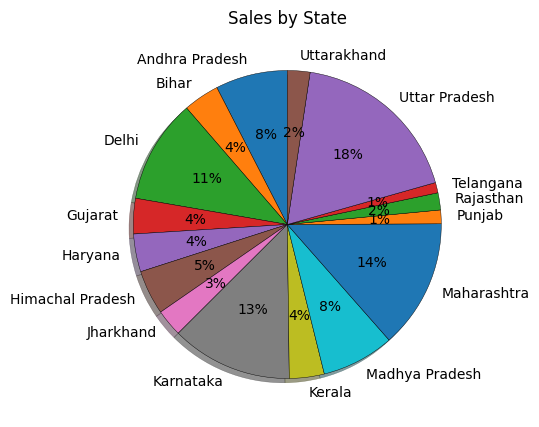

In [25]:
# 1)Pie Chart - Which gender contributes more to total sales?
plt.figure(figsize=(5,5))
sales_by_gender = data.groupby("State")["Amount"].sum()
plt.pie(sales_by_gender,labels=sales_by_gender.index ,autopct='%1.0f%%', startangle=90,shadow=True,radius=1.0,wedgeprops={"edgecolor": "black", "linewidth": 0.3})
plt.title("Sales by State")
plt.show()

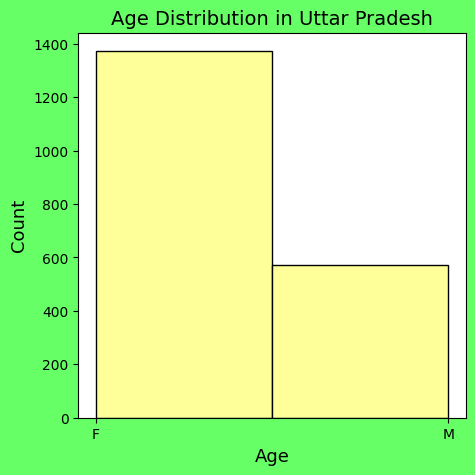

In [125]:
# 2)Histogram - Age Distribution froms state uttar
plt.figure(figsize=(5,5), facecolor="#66ff66")
tg=data[data["State"]=="Uttar Pradesh"]
plt.hist(data=tg,x="Gender", bins=2, color='#ffff99', edgecolor='black',width=0.5)
plt.xlabel("Age",size=13)
plt.ylabel("Count",size=13)
plt.title("Age Distribution in Uttar Pradesh",fontdict={"color": "black", "fontsize": 14})
plt.show()

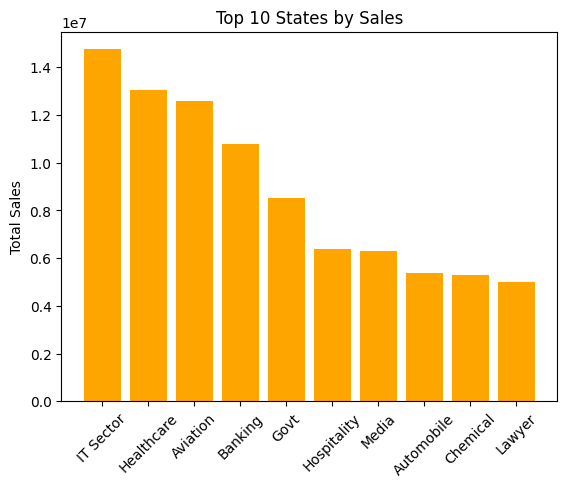

In [49]:
#3) Bar Graph - Sales by State
sales_by_occupation = data.groupby("Occupation")["Amount"].sum().sort_values(ascending=False).head(10)
plt.bar(sales_by_occupation.index, sales_by_occupation.values, color='orange')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.title("Top 10 States by Sales")
plt.show()


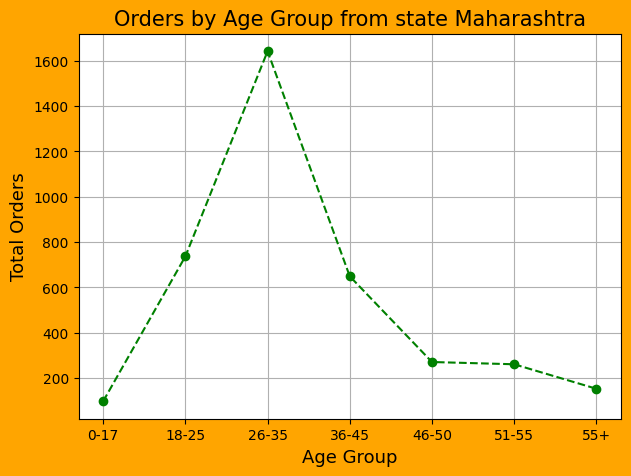

In [59]:
# 4)Line Graph - Orders by Age Group from state maharashtra
plt.figure(figsize=(7, 5), facecolor="orange")
maha=data[data["State"]=="Maharashtra"]
orders_by_age = maha.groupby("Age Group")["Orders"].sum()
plt.plot(orders_by_age.index, orders_by_age.values, marker='o', color='green',linestyle="--")
plt.ylabel("Total Orders",size=13)
plt.xlabel("Age Group",size=13)
plt.title("Orders by Age Group from state Maharashtra",size=15)
plt.grid(True)
plt.show()


**Seaborn**

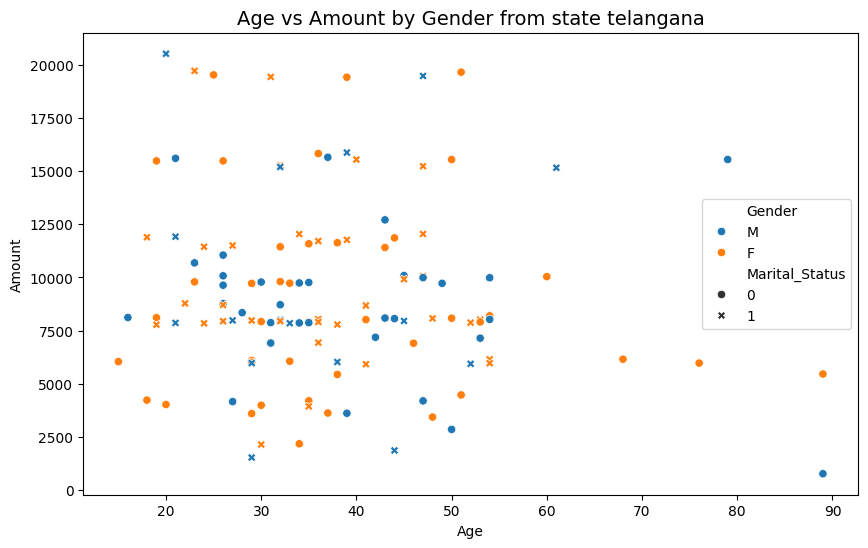

In [64]:
#1)scatter Plot - Age vs Amount from telangana
plt.figure(figsize=(10, 6))
tel=data[data["State"]=="Telangana"]
sns.scatterplot(data=tel, x="Age", y="Amount", hue="Gender",style="Marital_Status")
plt.title("Age vs Amount by Gender from state telangana",size=14)
plt.show()

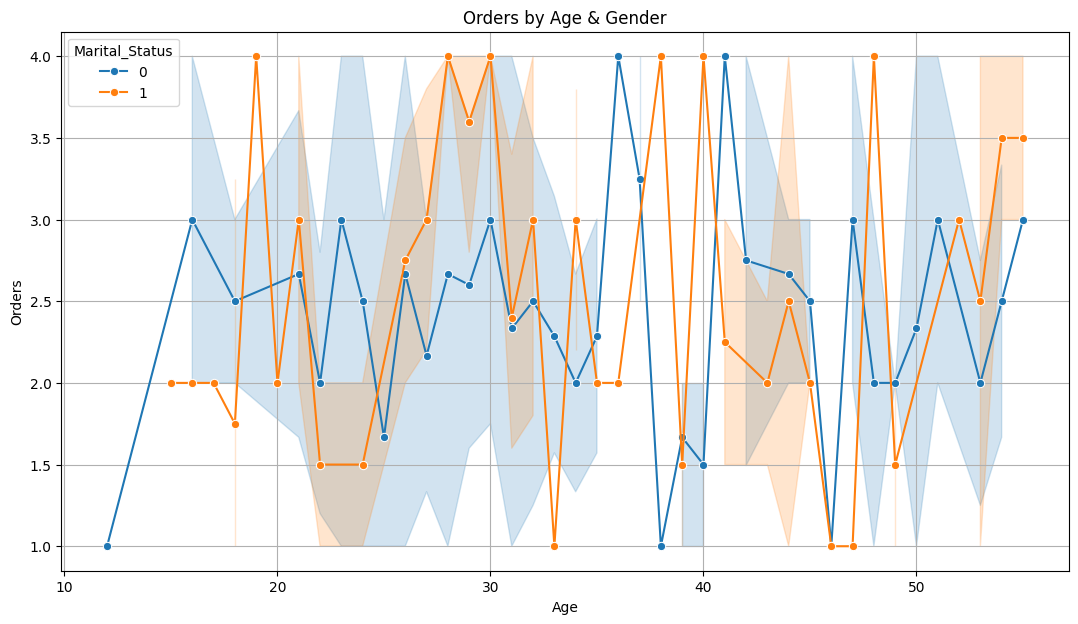

In [68]:
#2)Line Plot - Orders by Age from punjab
plt.figure(figsize=(13,7))
pun=data[data["State"]=="Punjab"]
sns.lineplot(data=pun, x="Age", y="Orders", hue="Marital_Status", marker='o')
plt.title("Orders by Age & Gender")
plt.grid(True)
plt.show()

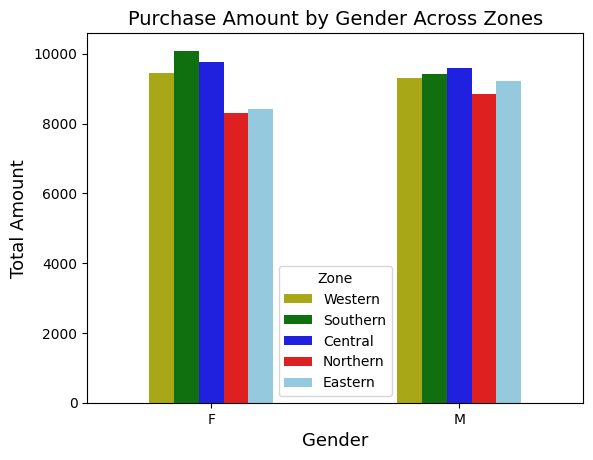

In [103]:

#3)Bar Plot - Amount by Gender and Zone
sns.barplot(data=data, x="Gender", y="Amount",errorbar=('ci',False),width=0.5,hue="Zone",palette=["y","g","b","r","skyblue"])
plt.title("Total Revenue Contribution by Gender across Zone",size=14)
plt.ylabel("Total Amount",size=13)
plt.xlabel("Gender",size=13)
plt.show()

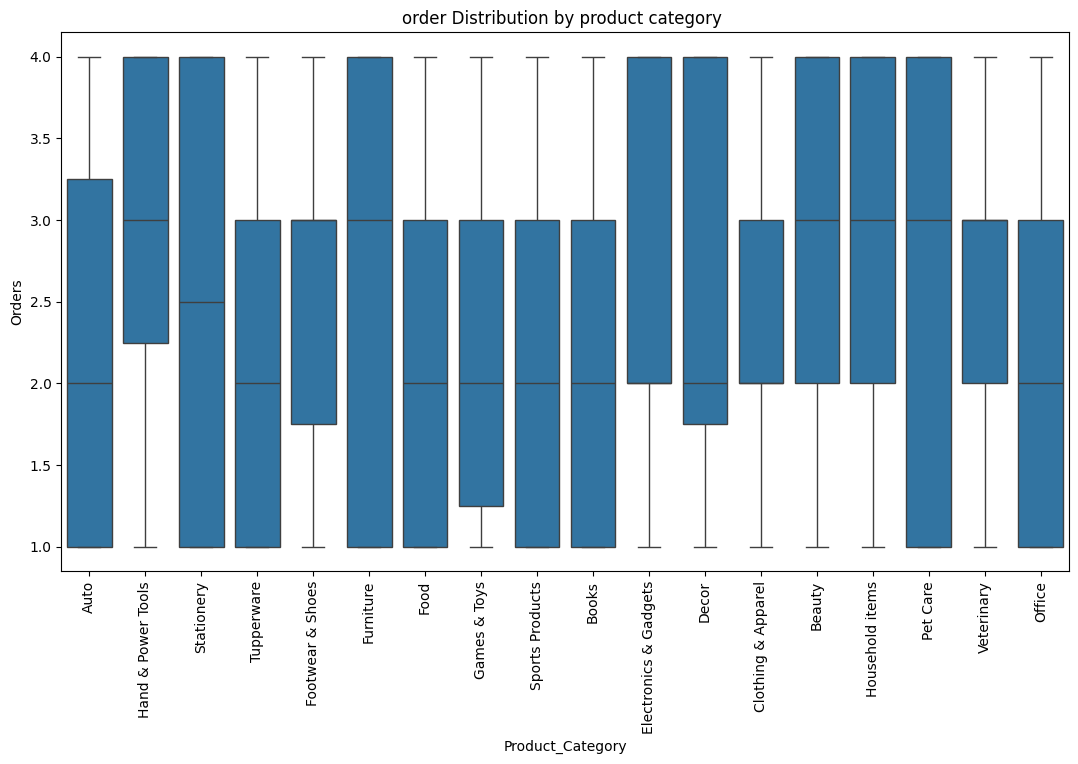

In [109]:
#4)Box Plot -category product and average order
plt.figure(figsize=(13,7))
sns.boxplot(data=data, x="Product_Category", y="Orders")
plt.title("order Distribution by product category ")
plt.xticks(rotation=90)
plt.show()

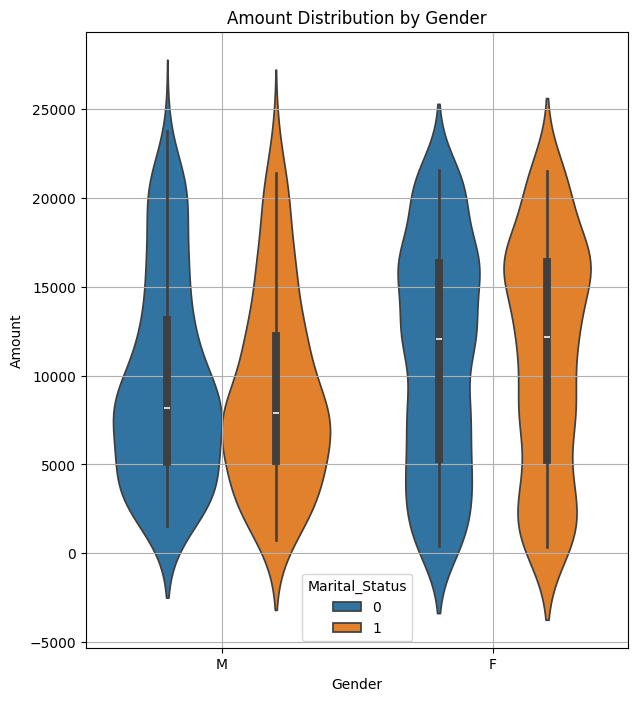

In [118]:
#5)Violin Plot - Amount spent according to marital_status and by Gender
Del=data[data["State"]=="Delhi"]
plt.figure(figsize=(7, 8))
sns.violinplot(data=Del, x="Gender", y="Amount",hue="Marital_Status")
plt.title("Amount Distribution by Gender")
plt.grid(True)
plt.show()

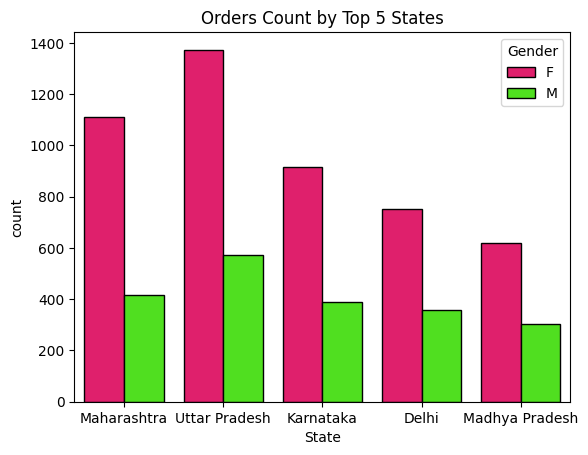

In [114]:
#6)Count Plot - Orders by State (Top 5)
top_states = data["State"].value_counts().head(5).index
sns.countplot(data=data[data["State"].isin(top_states)], x="State", hue="Gender",edgecolor="k", palette=["#ff0066","#40ff00"])
plt.title("Orders Count by Top 5 States")
plt.show()


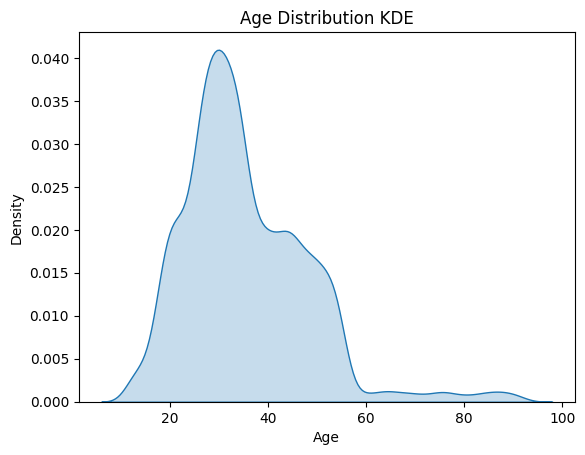

In [35]:
#7)KDE Plot - Age
sns.kdeplot(data=data, x="Age", fill=True)
plt.title("Age Distribution KDE")
plt.show()

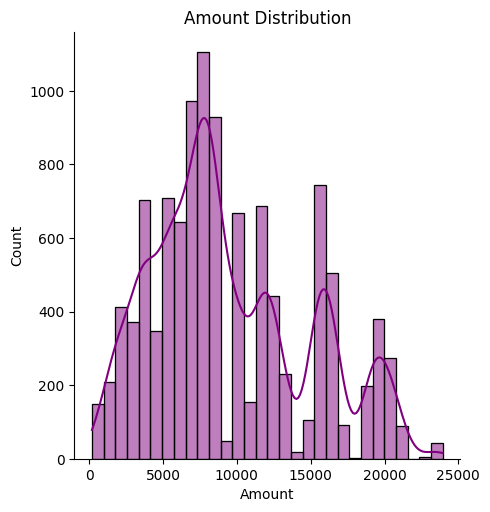

In [119]:
#8)Distribution Plot - Amount
sns.displot(data=data, x="Amount", kde=True, bins=30, color='purple',kind="hist")
plt.title("Amount Distribution")
plt.show()